Identify amount of calls for poor/unhealthy days-Comparative Study- Natalie


In [2]:
# please create a new file in jupyterhub named "project db sql access" and change the database name to "I501Fa21grp06_db"
myvars = {}
with open("project db sql access") as myfile:
    for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [3]:
import MySQLdb
import numpy as np
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db=myvars['DB databasename'])
cursor = conn.cursor()
cursor.execute('select `Category`, `AQI` FROM `AQIEMS` where `Category` LIKE "%Unhealthy%"')
rows = cursor.fetchall()
cursor.execute('select * FROM `AQI` where `Category` LIKE "%Unhealthy%"')
rows1 = cursor.fetchall()

cursor.execute('select `Category`, `AQI` FROM `AQI` where `Category` LIKE "%Unhealthy%"')
rows1 = cursor.fetchall()
poorAQIdays= (len(rows1))
poorAQIhosp=(len(rows))
poorAQIrate = np.true_divide(poorAQIhosp,poorAQIdays)
print('Total hospitalizations on poor AQI days:', poorAQIhosp)
print('Total poor AQI days:', poorAQIdays)
print('Total days between 2015 and 2018:', ((365*4)+1))
print('Rate of hospitalizations per poor air quality days:',(poorAQIrate))

Total hospitalizations on poor AQI days: 1277
Total poor AQI days: 381
Total days between 2015 and 2018: 1461
Rate of hospitalizations per poor air quality days: 3.351706036745407


In [4]:
cursor.execute('select `Category`, `AQI` FROM `AQI` where `Category` = "Moderate"')
rows4 = cursor.fetchall()
cursor.execute('select * FROM `AQIEMS` where `Category` = "Moderate"')
rows5 = cursor.fetchall()
moderateAQIdays= (len(rows4))
moderatehosp=(len(rows5))
moderateAQIrate = np.true_divide(moderatehosp,moderateAQIdays)
print(moderatehosp)
print(moderateAQIdays)
print('Rate of hospitalizations moderate air quality days:',(moderateAQIrate))

36129
8933
Rate of hospitalizations moderate air quality days: 4.0444419567894325


In [5]:
cursor.execute('select `Category`, `AQI` FROM `AQI` where `Category` = "Good"')
rows2 = cursor.fetchall()
cursor.execute('select `Category`, `AQI` FROM `AQIEMS` where `Category` = "Good"')
rows3 = cursor.fetchall()
goodAQIdays= (len(rows2))
goodAQIhosp=(len(rows3))
goodAQIrate = np.true_divide(goodAQIhosp,goodAQIdays)
print(goodAQIhosp)
print(goodAQIdays)
print('Rate of hospitalizations per good air quality days:',(goodAQIrate))

101748
41172
Rate of hospitalizations per good air quality days: 2.471291168755465


In [6]:
cursor.execute('select * FROM `AQI`')
rows6 = cursor.fetchall()
cursor.execute('select * FROM `AQIEMS`')
rows7 = cursor.fetchall()
allAQIdays= (len(rows6))
allhosp=(len(rows7))
allAQIrate = np.true_divide(allhosp,allAQIdays)
print(allhosp)
print(allAQIdays)
print('Rate of hospitalizations over all air quality days:',(allAQIrate))

139154
50486
Rate of hospitalizations over all air quality days: 2.7562888721625796


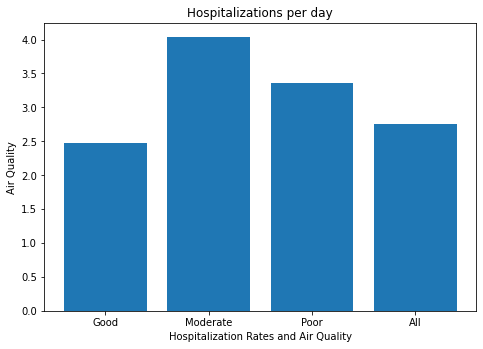

In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt
x = ['Good','Moderate','Poor','All']
y = [goodAQIrate,moderateAQIrate,poorAQIrate,allAQIrate]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xlabel('Hospitalization Rates and Air Quality')
plt.ylabel('Air Quality')
plt.title('Hospitalizations per day')
plt.show()

In [138]:
cursor.execute('SELECT `Defining Parameter`, AVG(`AQI`) FROM `AQIEMS` where `Category`= "Good" GROUP BY `Defining Parameter`')
rows1 = cursor.fetchall()
gooddays = rows1
gooddays

(('CO', Decimal('3.0000')),
 ('NO2', Decimal('28.1699')),
 ('Ozone', Decimal('36.2899')),
 ('PM10', Decimal('31.1914')),
 ('PM2.5', Decimal('34.2113')),
 ('SO2', Decimal('8.6729')))

In [8]:
cursor.execute('SELECT `Defining Parameter`, AVG(`AQI`) FROM `AQIEMS` where `Category`= "Moderate" GROUP BY `Defining Parameter`')
rows2 = cursor.fetchall()
moddays= rows2
moddays

(('NO2', Decimal('52.0000')),
 ('Ozone', Decimal('69.0375')),
 ('PM10', Decimal('58.1062')),
 ('PM2.5', Decimal('59.5637')),
 ('SO2', Decimal('71.6041')))

In [9]:
cursor.execute('SELECT `Defining Parameter`,`Category`, AVG(`AQI`) FROM `AQIEMS` GROUP BY `Defining Parameter`, `Category`' )
rows3 = cursor.fetchall()
days=rows3
days

(('CO', 'Good', Decimal('3.0000')),
 ('NO2', 'Good', Decimal('28.1699')),
 ('NO2', 'Moderate', Decimal('52.0000')),
 ('Ozone', 'Good', Decimal('36.2899')),
 ('Ozone', 'Moderate', Decimal('69.0375')),
 ('Ozone', 'Unhealthy', Decimal('114.4655')),
 ('PM10', 'Good', Decimal('31.1914')),
 ('PM10', 'Moderate', Decimal('58.1062')),
 ('PM10', 'Unhealthy', Decimal('101.0000')),
 ('PM2.5', 'Good', Decimal('34.2113')),
 ('PM2.5', 'Moderate', Decimal('59.5637')),
 ('PM2.5', 'Unhealthy', Decimal('128.2739')),
 ('SO2', 'Good', Decimal('8.6729')),
 ('SO2', 'Moderate', Decimal('71.6041')),
 ('SO2', 'Unhealthy', Decimal('113.4651')))

In [11]:
#various days list creation
pddata= {}
for contaminate, quality, average in days:
    if contaminate not in pddata:
        pddata[contaminate]= [0,0,0]
    if quality == "Good":
        pddata[contaminate][0]= average
    if quality == "Moderate":
        pddata[contaminate][1]= average
    if quality == "Unhealthy":
        pddata[contaminate][2]= average
print(pddata)

{'CO': [Decimal('3.0000'), 0, 0], 'NO2': [Decimal('28.1699'), Decimal('52.0000'), 0], 'Ozone': [Decimal('36.2899'), Decimal('69.0375'), Decimal('114.4655')], 'PM10': [Decimal('31.1914'), Decimal('58.1062'), Decimal('101.0000')], 'PM2.5': [Decimal('34.2113'), Decimal('59.5637'), Decimal('128.2739')], 'SO2': [Decimal('8.6729'), Decimal('71.6041'), Decimal('113.4651')]}


In [18]:
labels = []
pddata2 = [[],[],[]]
for contaminate, values in pddata.items():
    labels.append(contaminate)
    pddata2[0].append(values[0])
    pddata2[1].append(values[1])
    pddata2[2].append(values[2])
print(labels)
print(pddata2)

['CO', 'NO2', 'Ozone', 'PM10', 'PM2.5', 'SO2']
[[Decimal('3.0000'), Decimal('28.1699'), Decimal('36.2899'), Decimal('31.1914'), Decimal('34.2113'), Decimal('8.6729')], [0, Decimal('52.0000'), Decimal('69.0375'), Decimal('58.1062'), Decimal('59.5637'), Decimal('71.6041')], [0, 0, Decimal('114.4655'), Decimal('101.0000'), Decimal('128.2739'), Decimal('113.4651')]]


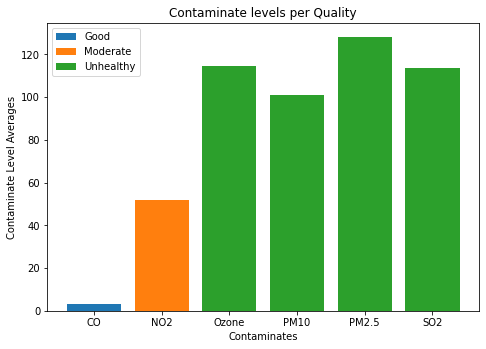

In [19]:
label=["Good","Moderate","Unhealthy"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for values in pddata2:
    ax.bar(labels,values)
plt.xlabel('Contaminates')
plt.ylabel('Contaminate Level Averages')
plt.title('Contaminate levels per Quality')
plt.legend(label)
plt.show()
# label=["Good","Moderate","Unhealthy"]
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# for values in pddata:
#     ax.bar(values, label)
# plt.xlabel('Contaminates')
# plt.ylabel('Contaminate Level Averages')
# plt.title('Contaminate levels per Quality')
# plt.legend(label)
# plt.show()

In [20]:
for values in pddata2:
    total = sum(values)
    for i in range(len(values)):
        values[i]/= total
print(pddata2)

[[Decimal('0.02119611065500221146087833856'), Decimal('0.1990307725134489322105989032'), Decimal('0.2564015786863215845647096062'), Decimal('0.2203787886281453261869468698'), Decimal('0.2417155001504923856505157014'), Decimal('0.06127724936658955992635058084')], [Decimal('0E+4'), Decimal('0.1675735510930145998456389789'), Decimal('0.2224780583381537584008327116'), Decimal('0.1872511975869408642605897622'), Decimal('0.1919480908699806484774170471'), Decimal('0.2307491021119101290155215002')], [Decimal('0E+4'), Decimal('0E+4'), Decimal('0.2503595218332278006887508762'), Decimal('0.2209077119757132749130859386'), Decimal('0.2805613243089252183650860829'), Decimal('0.2481714418821337060330771023')]]


In [21]:
pddata3={}
for label in labels:
    pddata3[label]=[]
for values in pddata2:
    for i in range(len(values)):
        label = labels[i]
        pddata3[label].append(values[i])
print(pddata3)

{'CO': [Decimal('0.02119611065500221146087833856'), Decimal('0E+4'), Decimal('0E+4')], 'NO2': [Decimal('0.1990307725134489322105989032'), Decimal('0.1675735510930145998456389789'), Decimal('0E+4')], 'Ozone': [Decimal('0.2564015786863215845647096062'), Decimal('0.2224780583381537584008327116'), Decimal('0.2503595218332278006887508762')], 'PM10': [Decimal('0.2203787886281453261869468698'), Decimal('0.1872511975869408642605897622'), Decimal('0.2209077119757132749130859386')], 'PM2.5': [Decimal('0.2417155001504923856505157014'), Decimal('0.1919480908699806484774170471'), Decimal('0.2805613243089252183650860829')], 'SO2': [Decimal('0.06127724936658955992635058084'), Decimal('0.2307491021119101290155215002'), Decimal('0.2481714418821337060330771023')]}


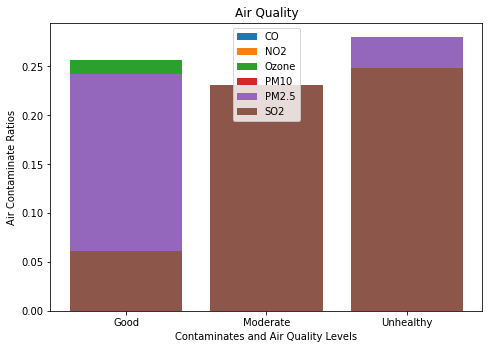

In [26]:
labels = ["Good","Moderate","Unhealthy"]
contaminates=[]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for contaminate, values in pddata3.items():
    ax.bar(labels,values,label= contaminate)
    contaminates.append(contaminate)
plt.xlabel('Contaminates and Air Quality Levels')
plt.ylabel('Air Contaminate Ratios')
plt.title('Air Quality')
plt.legend(contaminates)
plt.show()
#Sulfur Dioxide seems to be the biggest effect on Air Quality

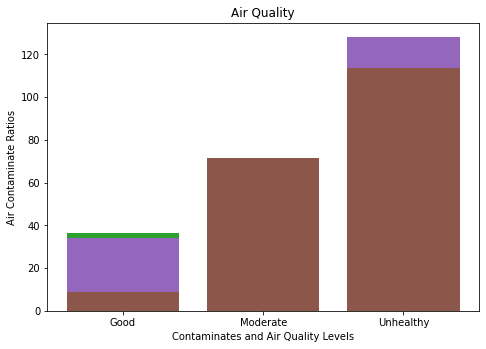

In [29]:
labels = ["Good","Moderate","Unhealthy"]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
for contaminate, values in pddata.items():
    ax.bar(labels,values,label= contaminate)
plt.xlabel('Contaminates and Air Quality Levels')
plt.ylabel('Air Contaminate Ratios')
plt.title('Air Quality')
plt.show()
#Non normalized chart on data